In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('regression/regression_data.xls')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [3]:
df = df.drop(['date'], axis = 1)
df.head(10)


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


In [32]:
df.shape[0]

21597

In [33]:
display(df['bedrooms'].unique())
display(df['bathrooms'].unique())
display(df['floors'].unique())
display(df['condition'].unique())
display(df['grade'].unique())

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

array([3, 5, 4, 1, 2])

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [34]:
df = df.sort_values('price', ascending = False)
display(df['id'].head(10))

7245    6762700020
3910    9808700762
9245    9208900037
4407    2470100110
1446    8907500070
1313    7558700030
1162    1247600105
8085    1924059029
2624    7738500731
8629    3835500195
Name: id, dtype: int64

In [35]:
df['price'].mean()

540296.5735055795

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

bedrooms
1      888.153061
2     1239.752899
3     1805.837235
4     2554.649666
5     3047.545284
6     3284.341912
7     3974.210526
8     3800.000000
9     3775.000000
10    3706.666667
11    3000.000000
33    1620.000000
Name: sqft_living, dtype: float64

waterfront
0    5.317623e+05
1    1.662524e+06
Name: price, dtype: float64

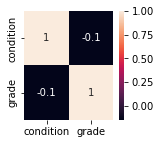

            
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


In [56]:
display(df.groupby('bedrooms')['price'].mean())
display(df.groupby('bedrooms')['sqft_living'].mean())
display(df.groupby('waterfront')['price'].mean())

plt.figure(figsize=(2,2))
sns.heatmap(df[['condition', 'grade']].corr(), annot=True, fmt='.1g')
plt.show()

print('            ')

print(df['condition'].value_counts())

In [37]:
df2 = df[(df['bedrooms'] == 3) | (df['bedrooms'] == 4) & (df['bathrooms'] > 3) & (df['floors'] == 1) & (df['waterfront'] == 0) & (df['condition'] >= 3) & (df['grade'] >= 5) & (df['price'] < 300000)]
df2

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
19002,2303900100,3,4.25,5510,35000,2.0,0,4,3,13,4910,600,1997,0,98177,47.7296,-122.370,3430,45302,3800000
2862,4114601570,3,3.25,5020,12431,2.0,1,4,3,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620,3600000
7982,9362000040,3,4.50,5230,17826,2.0,1,4,3,10,3740,1490,2005,0,98040,47.5348,-122.243,3670,17826,3400000
18185,3625059152,3,3.25,4220,41300,1.0,1,4,4,11,2460,1760,1958,1987,98008,47.6083,-122.110,3810,30401,3300000
11523,8964800890,3,3.25,4560,13363,1.0,0,4,3,11,2760,1800,1995,0,98004,47.6205,-122.214,4060,13362,3200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,1788800630,3,1.00,840,12091,1.0,0,0,3,6,840,0,1959,0,98023,47.3281,-122.343,840,9324,96500
18924,4239400300,3,1.00,980,2490,2.0,0,0,4,6,980,0,1969,0,98092,47.3170,-122.182,980,3154,90000
5860,9320900420,3,1.00,900,4750,1.0,0,0,4,6,900,0,1969,0,98023,47.3026,-122.363,900,3404,89000
13743,1788900230,3,1.00,840,9480,1.0,0,0,3,6,840,0,1960,0,98023,47.3277,-122.341,840,9420,86500


In [39]:
df3 = df[df['price'] > (df['price'].mean()*2)]
df3

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
3910,9808700762,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
9245,9208900037,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
4407,2470100110,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
1446,8907500070,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,1326059182,5,3.25,5600,107157,2.0,0,0,3,10,3440,2160,1988,0,98072,47.7341,-122.102,3470,75794,1090000
5060,4385700660,3,1.50,2560,4000,1.5,0,0,5,8,1660,900,1927,0,98112,47.6384,-122.279,2560,4000,1090000
12549,3760500730,4,2.75,3010,10830,2.0,0,3,4,9,3010,0,1980,0,98034,47.7005,-122.232,3010,10650,1090000
8664,4151800530,4,2.50,2780,6837,2.0,0,0,3,9,2780,0,2004,0,98033,47.6660,-122.201,1160,6837,1090000


In [43]:
df4 = df[df['bedrooms'] == 3]
df5 = df[df['bedrooms'] == 4]

print('3: ', df4['price'].mean())
print('4: ',df5['price'].mean())

3:  466276.59089983715
4:  635564.6771287416


In [45]:
print(df['zipcode'].unique())

[98102 98004 98039 98040 98033 98155 98006 98177 98105 98144 98008 98112
 98075 98199 98109 98034 98074 98119 98056 98107 98118 98027 98166 98115
 98053 98136 98052 98029 98125 98116 98122 98065 98005 98045 98077 98024
 98059 98103 98178 98014 98028 98072 98058 98146 98070 98117 98038 98198
 98007 98023 98126 98011 98019 98003 98010 98092 98042 98022 98001 98133
 98031 98106 98188 98108 98055 98148 98168 98030 98032 98002]


In [46]:
df6 = df[df['yr_renovated'] != 0]
df6

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
3910,9808700762,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
8085,1924059029,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4670000
2862,4114601570,3,3.25,5020,12431,2.0,1,4,3,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620,3600000
10435,1118000320,4,4.00,4260,11765,2.0,0,0,3,11,3280,980,1939,2010,98112,47.6380,-122.288,4260,10408,3400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,3163600076,1,1.00,1020,6871,1.0,0,0,3,6,1020,0,1937,1946,98146,47.5051,-122.338,1260,6933,152275
12971,9320900610,3,1.00,900,4770,1.0,0,0,3,6,900,0,1969,2009,98023,47.3038,-122.362,900,3480,146000
15526,3361400980,2,1.00,600,6120,1.0,0,0,3,5,600,0,1943,1989,98168,47.5000,-122.317,1090,6120,135000
2587,5061300030,2,1.50,980,5000,2.0,0,0,3,7,980,0,1922,2003,98014,47.7076,-121.359,1040,5000,134000


In [47]:
df7 = df.sort_values(by='price', ascending=False)
print(df7.iloc[10])

id               6.065300e+09
bedrooms         5.000000e+00
bathrooms        6.000000e+00
sqft_living      7.440000e+03
sqft_lot         2.154000e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.200000e+01
sqft_above       5.550000e+03
sqft_basement    1.890000e+03
yr_built         2.003000e+03
yr_renovated     0.000000e+00
zipcode          9.800600e+04
lat              4.756920e+01
long            -1.221890e+02
sqft_living15    4.740000e+03
sqft_lot15       1.932900e+04
price            4.210000e+06
Name: 12358, dtype: float64


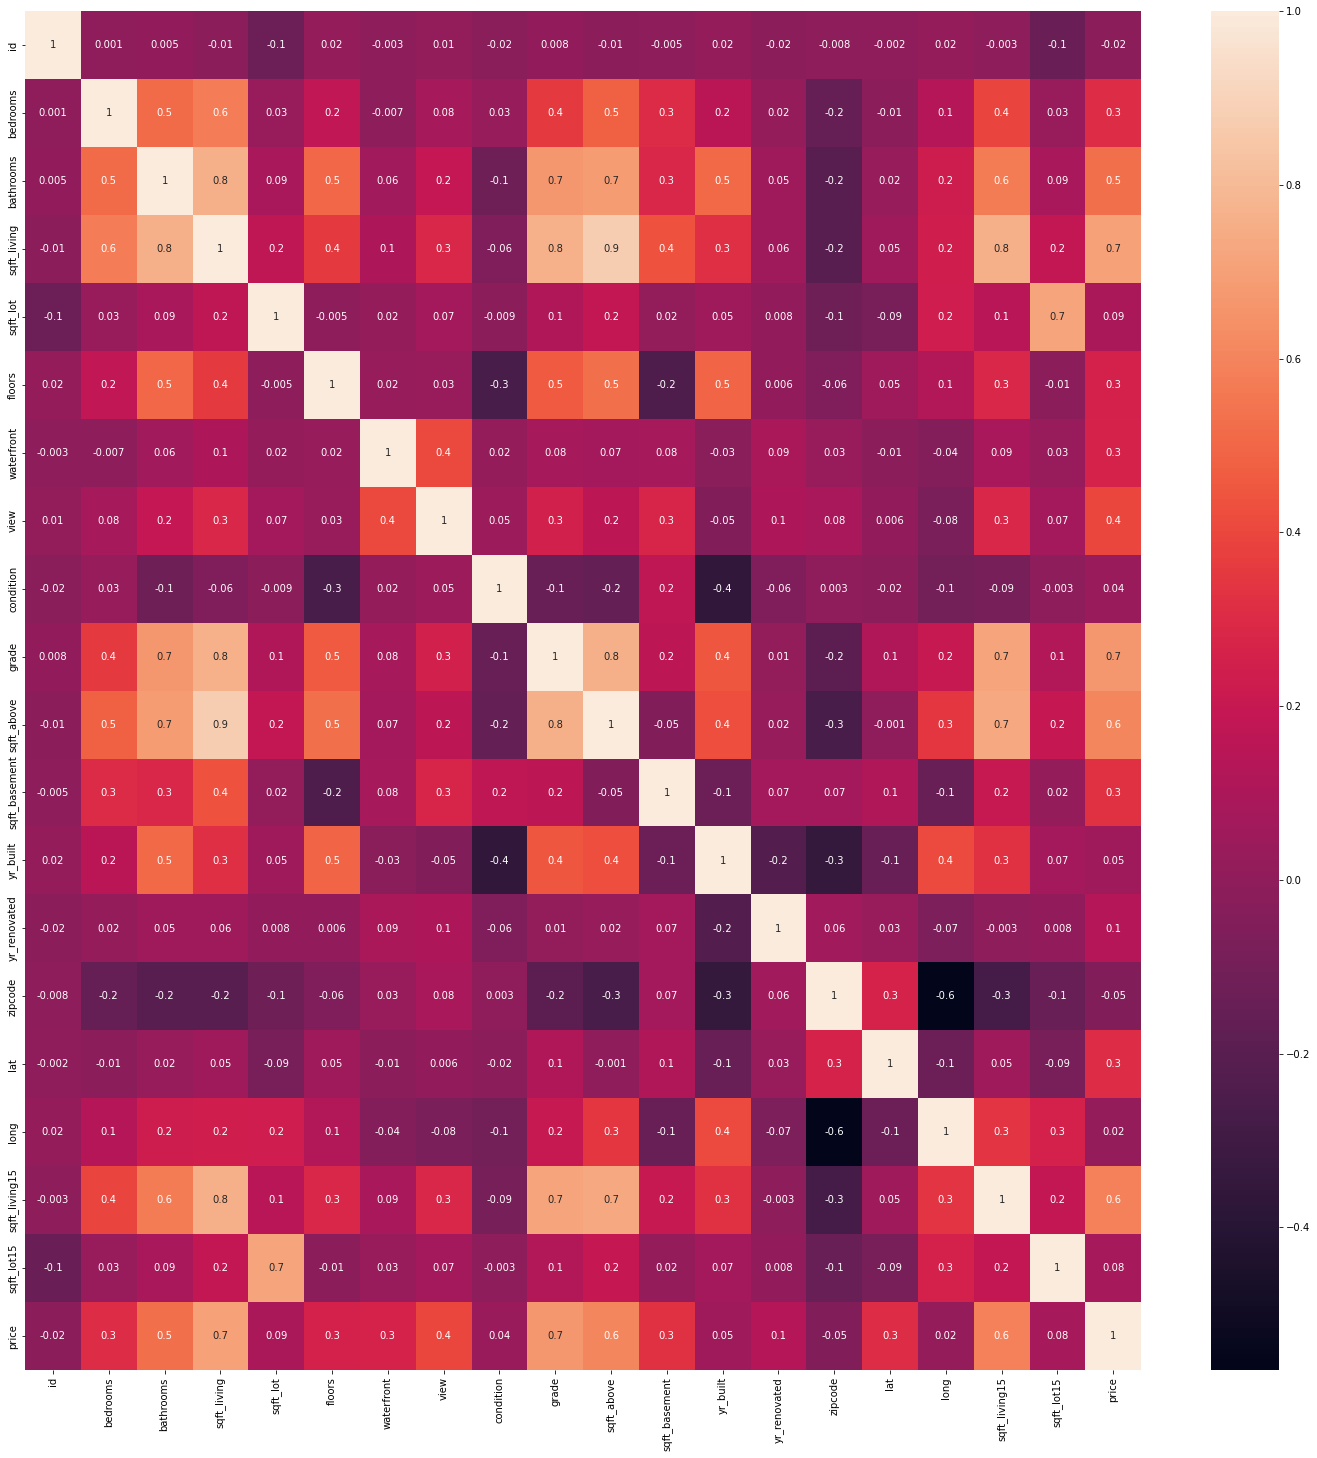

In [63]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt='.1g')
plt.show()
